In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


2024-10-26 12:10:54.240616: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-26 12:10:54.499192: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-26 12:10:54.767912: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-26 12:10:55.019339: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-26 12:10:55.081746: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-26 12:10:55.609073: I tensorflow/core/platform/cpu_feature_gu

In [2]:
data_train_path = './Fruits_Vegetables/train'
data_test_path = './Fruits_Vegetables/test'
data_val_path = './Fruits_Vegetables/validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 334 files belonging to 4 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['lemon', 'lettuce', 'mango', 'orange']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 334 files belonging to 4 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 334 files belonging to 4 classes.


2024-10-26 12:11:27.270350: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47775744 exceeds 10% of free system memory.
2024-10-26 12:11:27.354751: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21331200 exceeds 10% of free system memory.
2024-10-26 12:11:27.741549: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26639340 exceeds 10% of free system memory.
2024-10-26 12:11:27.752911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-26 12:11:27.752997: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24645600 exceeds 10% of free system memory.
2024-10-26 12:11:27.763096: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30233088 exceeds 10% of free system memory.
2024-10-26 12:11:28.598557: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of seque

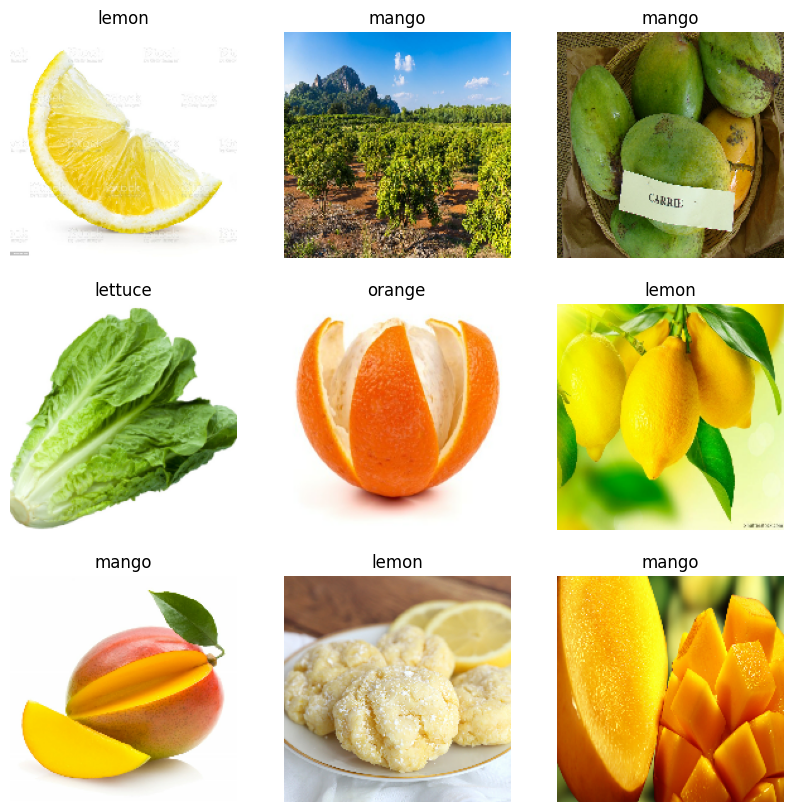

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25


 1/11 ━━━━━━━━━━━━━━━━━━━━ 1:24 8s/step - accuracy: 0.3750 - loss: 1.3615

2024-10-26 12:11:57.623335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2590 - loss: 3.6675

2024-10-26 12:12:22.234745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.2589 - loss: 3.6042 - val_accuracy: 0.4132 - val_loss: 1.2076
Epoch 2/25


2024-10-26 12:12:34.997360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5014 - loss: 1.0940

2024-10-26 12:13:05.266053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.5061 - loss: 1.0877 - val_accuracy: 0.6617 - val_loss: 0.8957
Epoch 3/25
 3/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7569 - loss: 0.8263

2024-10-26 12:13:24.442912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7219 - loss: 0.8213

2024-10-26 12:13:43.257897: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.7208 - loss: 0.8194 - val_accuracy: 0.7006 - val_loss: 0.6828
Epoch 4/25
 6/11 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.7350 - loss: 0.6298

2024-10-26 12:14:13.705682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7374 - loss: 0.6259

2024-10-26 12:14:24.464828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.7379 - loss: 0.6250 - val_accuracy: 0.7814 - val_loss: 0.5489
Epoch 5/25
 3/11 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.7413 - loss: 0.6016

2024-10-26 12:14:46.431918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7946 - loss: 0.5333

2024-10-26 12:15:03.966982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.7973 - loss: 0.5296 - val_accuracy: 0.8653 - val_loss: 0.4054
Epoch 6/25


2024-10-26 12:15:24.723839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9042 - loss: 0.3329

2024-10-26 12:15:45.249460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.9035 - loss: 0.3329 - val_accuracy: 0.9162 - val_loss: 0.2828
Epoch 7/25


2024-10-26 12:15:57.833079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9321 - loss: 0.2580

2024-10-26 12:16:19.445335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9312 - loss: 0.2570 - val_accuracy: 0.9581 - val_loss: 0.1729
Epoch 8/25
 2/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9062 - loss: 0.2630

2024-10-26 12:16:34.927299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9245 - loss: 0.2544

2024-10-26 12:16:56.696658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.9263 - loss: 0.2511 - val_accuracy: 0.9581 - val_loss: 0.1599
Epoch 9/25
 1/11 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.9688 - loss: 0.1232

2024-10-26 12:17:09.016548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9612 - loss: 0.1523

2024-10-26 12:17:33.917709: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.9614 - loss: 0.1518 - val_accuracy: 0.9521 - val_loss: 0.1384
Epoch 10/25


2024-10-26 12:17:54.338581: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9842 - loss: 0.0805

2024-10-26 12:18:20.422590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.9843 - loss: 0.0815 - val_accuracy: 0.9910 - val_loss: 0.0604
Epoch 11/25
 2/11 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9922 - loss: 0.0561

2024-10-26 12:18:37.255168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9880 - loss: 0.0551

2024-10-26 12:18:51.550217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.9878 - loss: 0.0559 - val_accuracy: 0.9910 - val_loss: 0.0437
Epoch 12/25


2024-10-26 12:19:02.023170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9712 - loss: 0.0905

2024-10-26 12:19:23.694106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9718 - loss: 0.0894 - val_accuracy: 0.9850 - val_loss: 0.0608
Epoch 13/25
 1/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 1.0000 - loss: 0.0270

2024-10-26 12:19:34.659186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9918 - loss: 0.0496

2024-10-26 12:19:53.069750: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.9918 - loss: 0.0499 - val_accuracy: 0.9970 - val_loss: 0.0271
Epoch 14/25
 2/11 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 1.0000 - loss: 0.0246

2024-10-26 12:20:07.438868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9945 - loss: 0.0252

2024-10-26 12:20:21.933352: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9942 - loss: 0.0256 - val_accuracy: 0.9970 - val_loss: 0.0179
Epoch 15/25
 2/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 1.0000 - loss: 0.0155  

2024-10-26 12:20:48.660476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 0.0233

2024-10-26 12:21:08.251586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 1.0000 - loss: 0.0236 - val_accuracy: 1.0000 - val_loss: 0.0116
Epoch 16/25


2024-10-26 12:21:18.836851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9966 - loss: 0.0183

2024-10-26 12:21:40.918635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.9966 - loss: 0.0182 - val_accuracy: 1.0000 - val_loss: 0.0075
Epoch 17/25
 2/11 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 1.0000 - loss: 0.0049  

2024-10-26 12:22:03.556663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 0.0079

2024-10-26 12:22:23.492139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 18/25
 4/11 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 1.0000 - loss: 0.0053

2024-10-26 12:22:43.390592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 0.0046

2024-10-26 12:22:55.793226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 19/25


2024-10-26 12:23:16.591940: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 0.0038

2024-10-26 12:23:38.954205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 20/25
 3/11 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 1.0000 - loss: 0.0019

2024-10-26 12:24:06.146408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 0.0023

2024-10-26 12:24:22.021085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 21/25


2024-10-26 12:24:32.125093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 0.0018

2024-10-26 12:24:54.634250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 22/25
 7/11 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 1.0000 - loss: 0.0017 

2024-10-26 12:25:27.892166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 0.0018

2024-10-26 12:25:34.907723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 23/25
 6/11 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 1.0000 - loss: 0.0014

2024-10-26 12:26:07.405880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 0.0014

2024-10-26 12:26:19.306270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 24/25
 1/11 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 1.0000 - loss: 0.0015

2024-10-26 12:26:32.151456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 0.0014

2024-10-26 12:26:54.119505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 9.6372e-04
Epoch 25/25


2024-10-26 12:27:09.479029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 0.0012

2024-10-26 12:27:37.546499: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 8.8541e-04


Text(0.5, 1.0, 'Loss')

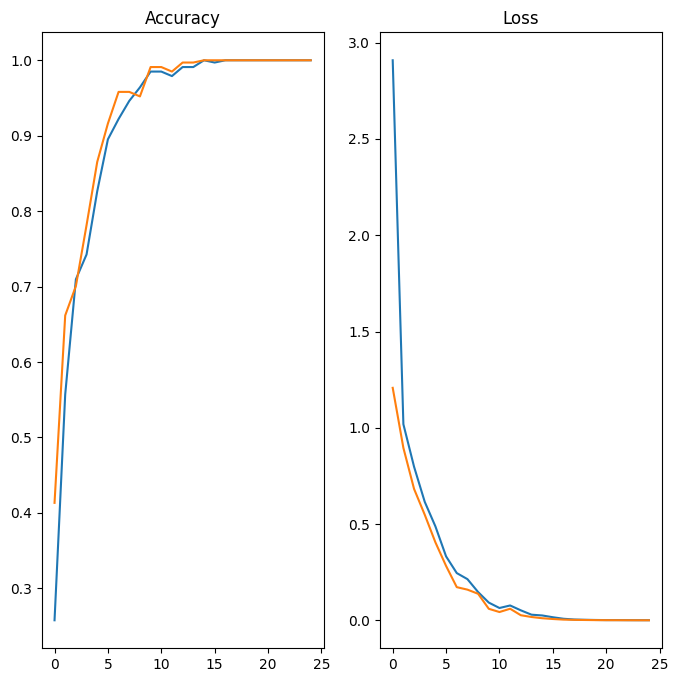

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [19]:
image = './Fruits_Vegetables/test/lemon/Image_1.png'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [20]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


In [21]:
score = tf.nn.softmax(predict)

In [22]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is lemon with accuracy of 99.99


In [23]:
model.save('Image_classify.keras')